# Binary Phase Diagrams for Ideal Mixtures

by Jeffrey Kantor  (jeff at nd.edu). The latest version of this notebook is available at [https://github.com/jckantor/CBE20255](https://github.com/jckantor/CBE20255). 

### Summary

This notebook shows how to use Raoult's Law and Antoine's equations to calculate Pxy, Txy, and xy diagrams for binary mixtures. The video is used with permission from [LearnChemE](http://learncheme.com/), a project at the University of Colorado funded by the National Science Foundation and the Shell Corporation.

## Introduction

For binary mixtures, Raoult's law provides a very useful equilibrium relationship between pressure, temperature, and composition of liquid and vapor phases. This relationship can be expressed as a set of equations, or graphically as

* **Pxy Diagram** relationship of pressure, liquid, and vapor composition at fixed temperature.
* **Txy Diagram** relationship of temperature, liquid, and vapor composition at fixed pressure.
* **xy Diagram** relationhip between liquid and vapor phase composition, usually plotted at fixed pressure.

The following [video](https://www.youtube.com/watch?v=E_Vuz8cfbEo&feature=youtu.be) from [LearnChemE](http://www.learncheme.com/) gives a brief introduction.

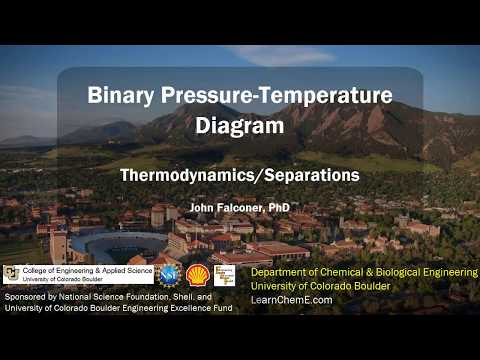

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('E_Vuz8cfbEo') 

## A Simple Chemical Data Set

The calculations in this notebook uses Antoine's equation to compute the saturation vapor pressure given temperature, and solves Antoine's equation for the saturation temperature when given pressure. For this purpose, we create a simple Python class to store data for a set of species, and to provide functions to compute saturation pressures and temperatures.

The use of Python class is a more advanced aspect of Python programming that has been deliberately avoided in these notebooks. In this instance, however, the use of a class to store species data significantly streamlines the notebook.

Those seeking a complete Python implementation of a chemical property dataset should consider the [thermo](https://pypi.org/project/thermo/) library available here: Caleb Bell (2016). thermo: Chemical properties component of Chemical Engineering Design Library (ChEDL)
https://github.com/CalebBell/thermo.

In [0]:
from scipy.optimize import brentq

class Species(object):
  
  def __init__(self, name='no name', Psat=lambda T: null):
    self.name = name
    self.Psat = Psat
  
  # compute saturation pressure given temperature. 
  def Psat(self, T):
    raise Exception('Psat() has not been defined for ' + self.name)
  
  # compute saturation temperature given pressure
  def Tsat(self, P):
    return brentq(lambda T: self.Psat(T) - P, -50, 200)
  
# create a dictionary with data for a select group of species
species_data = dict()
species_data['acetone'] = Species('acetone', lambda T: 10**(7.02447 - 1161.0/(T + 224)))
species_data['benzene'] = Species('benzene', lambda T: 10**(6.89272 - 1203.531/(T + 219.888)))
species_data['ethanol'] = Species('ethanol', lambda T: 10**(8.04494 - 1554.3/(T + 222.65)))
species_data['hexane']  = Species('hexane',  lambda T: 10**(6.88555 - 1175.817/(T + 224.867)))
species_data['toluene'] = Species('toluene', lambda T: 10**(6.95808 - 1346.773/(T + 219.693)))

The following cell demonstrates use of this class to compute normal boiling points for species included in the data set.

In [14]:
# report normal boiling points
for s in species_data.keys():
  print(species_data[s].name, round(species_data[s].Tsat(760),1))


acetone 56.2
benzene 80.1
ethanol 78.3
hexane 68.7
toluene 110.6


## Select Species

Using the dropdown menus to choose the species for subsequent notebook calculations.

In [17]:
#@title Select Species { run: "auto", vertical-output: true }

a = "acetone" #@param ["acetone", "benzene", "ethanol", "hexane", "toluene"] {allow-input: true}
b = "ethanol" #@param ["acetone", "benzene", "ethanol", "hexane", "toluene"] {allow-input: true}

A = species_data[a]
B = species_data[b]

print('A = ', A.name)
print('B = ', B.name)


A =  acetone
B =  ethanol


## Raoult's Law for Binary Mixtures

For an ideal **binary mixture** of $A$ and $B$, the vapor phase pressure $P$ is the sum of component partial pressures $p_A$ and $p_B$

\begin{equation}
P = p_A + p_B
\end{equation}

Raoult's law, in turn, says for ideal mixtures

\begin{align*}
p_A & = x_A P^{sat}_A(T) \\
p_B & = x_B P^{sat}_B(T)
\end{align*}

Eliminate partial pressures and obtain an expression for total vapor pressure.

\begin{equation}
P = x_A P_A^{sat}(T) + x_B P_A^{sat}(T)
\end{equation}

For binary mixtures, the substitution $x_B = 1-x_A$ gives an expression for total pressure as a function of composition $x_A$ and temperature.

\begin{equation}
P = \underbrace{x_A P_A^{sat}(T)}_{p_A = y_AP}+ \underbrace{(1-x_A) P_A^{sat}(T)}_{p_B=(1-y_B)P}
\end{equation}

In the Raoult's Law notebook, we demonstrated this relationship with the a plot which fixed temperature, then plotted $P$, $p_A$, and $p_B$ as functions of $x_A$.

The first step is to select two species, then create functions that evaluate Antoine's equation for the saturation vapor pressure of each species. Run the following code cell to enter this data into the Python workspace.

The next step is to select a temperature $T$ and run the following cell. This cell will  evaluate and display $P$, $p_A$ and $p_B$ functions of liquid phase mole fraction $x_A$.

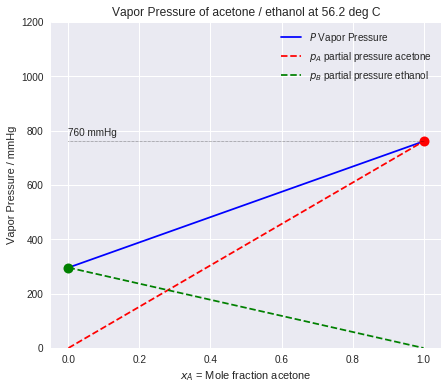

In [20]:
#@title Raoult's Law { run: "auto", vertical-output: true, form-width: "500px"}
#@markdown Adjust the slider to set the liquid temperature.
T = 56.2 #@param {type:"slider", min:20, max:70, step:0.2}

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# compute partial pressures and total pressure
xA = np.linspace(0,1)
pA = xA*A.Psat(T)
pB = (1-xA)*B.Psat(T)
Pv = pA + pB

# create plot
plt.figure(figsize=(7,6))
plt.plot(xA, Pv,'b')
plt.plot(xA, pA,'r--')
plt.plot(xA, pB,'g--')

# mark pure component saturation pressures
plt.plot(0, B.Psat(T), 'g.', ms=20)
plt.plot(1, A.Psat(T), 'r.', ms=20)

# annotate the plot
plt.plot([0,1],[760,760],'k:', lw=0.5)
plt.text(0, 780, '760 mmHg')
plt.ylim(0, 1200)
plt.xlabel('$x_A$ = Mole fraction ' + A.name)
plt.ylabel('Vapor Pressure / mmHg')
plt.title('Vapor Pressure of '+A.name+' / '+B.name+
          ' at {:.1f} deg C'.format(T))
plt.legend(['$P$ Vapor Pressure',
            '$p_A$ partial pressure ' + A.name,
            '$p_B$ partial pressure ' + B.name])
plt.show()

**Thing to Do / Things to Think About**

1. Use the temperature slider to determine the approximate boiling point of pure acetone.
2. What is the approximate boiling point of an acetone/ethanol mixture that is 40 mole% acetone? 
3. What is the corresponding vapor phase composition?

## Phase Diagrams

The dashed lines denote the partial presssures of $A$ and $B$. This information can be used compute the vapor phase composition

\begin{align*}
y_A & = \frac{p_A}{p_A + p_B} = \frac{p_A}{P} & \mbox{Dalton's & Ideal Gas Law} \\
\implies y_A & = x_A\frac{P^{sat}_A(T)}{P} & \mbox{Raoult's Law}
\end{align*}

We'll add this information to plot computing $y_A$ and then plotting coordinate pairs $(y_A, P)$.

The key to reading this diagram is to start with a value of the liquid phase composition, $x_A$, look up to find the vapor pressure, then look right to find the vapor composition.

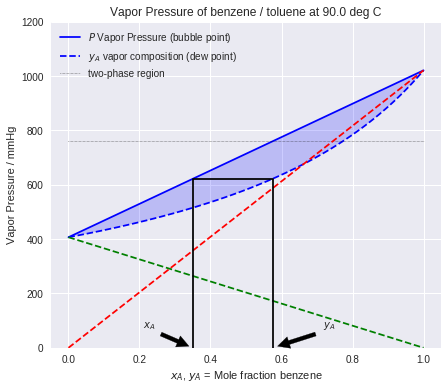

In [152]:
#@title Phase Diagrams { run: "auto", vertical-output: true }
T = 90 #@param {type:"slider", min:30, max:140, step:1}
xA = 0.35 #@param {type:"slider", min:0, max:1, step:0.01}
show_partial_pressures = True #@param {type:"boolean"}
show_tie_line = True #@param {type:"boolean"}

xA_save = xA

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# compute partial pressures and total pressure
xA = np.linspace(0,1)
pA = xA*A.Psat(T)
pB = (1-xA)*B.Psat(T)
Pv = pA + pB
yA = pA/Pv

# create plot
plt.figure(figsize=(7,6))
plt.plot(xA, Pv, 'b')
plt.plot(yA, Pv, 'b--')
plt.gca().fill_betweenx(Pv, xA, yA, 
                        facecolor='blue', alpha=0.2)
   
# annotate the plot
plt.plot([0,1], [760,760], 'k:', lw=0.5)
plt.ylim(0, 1200)
plt.xlabel('$x_A$, $y_A$ = Mole fraction ' + A.name)
plt.ylabel('Vapor Pressure / mmHg')
plt.title('Vapor Pressure of '+A.name+' / '+B.name+
          ' at {:.1f} deg C'.format(T))
plt.legend(['$P$ Vapor Pressure (bubble point)',
            '$y_A$ vapor composition (dew point)',
            'two-phase region'])

if show_partial_pressures:
    plt.plot(xA, pA, 'r--')
    plt.plot(xA, pB, 'g--')

# show how to use
if show_tie_line:
    xA = xA_save
    pA = xA*A.Psat(T)     # partial pressure A
    pB = (1-xA)*B.Psat(T) # partial pressure B
    Pv = pA + pB          # vapor pressure
    yA = pA/Pv            # vapor phase composition            )

    plt.plot([xA, xA, yA, yA], [0, Pv, Pv, 0], 'k')
    plt.annotate('$x_A$', xy=(xA,0), xycoords='data',
             xytext=(-50,20), textcoords='offset pixels',
             arrowprops=dict(facecolor='black', shrink=0.1))
    plt.annotate('$y_A$', xy=(yA,0), xycoords='data',
             xytext=(50,20), textcoords='offset pixels',
             arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()


## Diagrams for Binary Mixtures

For a **binary mixture** of $A$ and $B$, using Raoult's law to eliminate partial pressures gives

\begin{align*}
P & = x_A P_A^{sat}(T) + x_B P_A^{sat}(T) \\
 y_A P & =x_A P_A^{sat}(T) \\
\end{align*}

substituting $x_B = 1-x_A$

\begin{align*}
P & = x_A P_A^{sat}(T) + (1-x_A) P_A^{sat}(T) \\
 y_A & = x_A \frac{ P_A^{sat}(T)}{P}\\
\end{align*}

Solving for $x_A$ and $y_A$

\begin{align*}
x_A & = \frac{P - P_B^{sat}(T)}{P_A^{sat}(T) - P_B^{sat}(T)}\\
y_A & = \frac{P - P_B^{sat}(T)}{P_A^{sat}(T) - P_B^{sat}(T)}\frac{P_A^{sat}(T)}{P}
\end{align*}

This gives the liquid phase and vapor phase compositions, $x_A$ and $y_A$ respectively, in terms pressure and temperature. This is very useful for the analysis of separation processes.

### Pxy Diagram

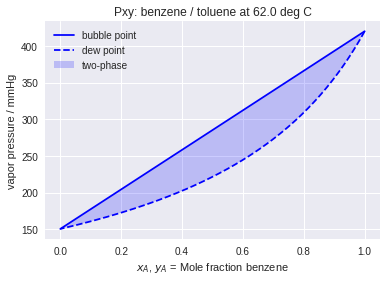

In [145]:
#@title Pxy Diagram { run: "auto", vertical-output: true }
T = 62 #@param {type:"slider", min:30, max:140, step:1}

import matplotlib.pyplot as plt
import numpy as np

def Pxy(A, B, T=0): # , z=0, P=760):
    Pp = np.linspace(A.Psat(T), B.Psat(T))
    xA = (Pp - B.Psat(T))/(A.Psat(T) - B.Psat(T))
    yA = xA*A.Psat(T)/Pp
    plt.plot(xA, Pp, 'b')
    plt.plot(yA, Pp, 'b--')
    plt.gca().fill_betweenx(Pp, xA, yA, facecolor='blue', alpha=0.2)
    plt.xlabel('$x_A$, $y_A$ = Mole fraction ' + A.name)
    plt.ylabel('vapor pressure / mmHg')
    plt.title('Pxy: '+A.name+' / '+B.name+' at {:.1f} deg C'.format(T))
    plt.legend(['bubble point', 'dew point', 'two-phase'])
    
Pxy(A, B, T)

### Txy Diagram

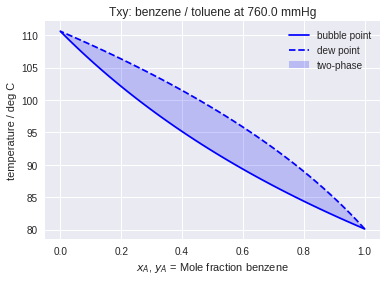

In [146]:
#@title Txy Diagram { run: "auto", vertical-output: true }
P = 760 #@param {type:"slider", min:200, max:1200, step:10}

import matplotlib.pyplot as plt
import numpy as np

def Txy(A, B, P=760):  #, z=0, T=0):
    Tp = np.linspace(A.Tsat(P), B.Tsat(P))
    xA = (P - B.Psat(Tp))/(A.Psat(Tp) - B.Psat(Tp))
    yA = xA*A.Psat(Tp)/P
    plt.plot(xA, Tp, 'b')
    plt.plot(yA, Tp, 'b--')
    plt.gca().fill_betweenx(Tp, xA, yA, facecolor='blue', alpha=0.2)
    plt.xlabel('$x_A$, $y_A$ = Mole fraction ' + A.name)
    plt.ylabel('temperature / deg C')
    plt.title('Txy: '+A.name+' / '+B.name+' at {:.1f} mmHg'.format(P))
    plt.legend(['bubble point', 'dew point', 'two-phase'])
    
Txy(A, B, P)

### xy Diagram

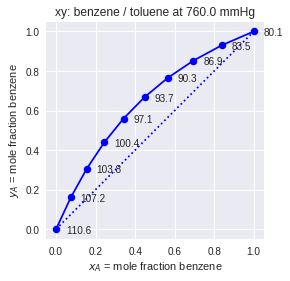

In [149]:
#@title xy Diagram { run: "auto", vertical-output: true }
P = 760 #@param {type:"slider", min:200, max:1200, step:10}

import matplotlib.pyplot as plt
import numpy as np

def xy(A, B, P=760):  #, z=0, T=0):
    Tp = np.linspace(A.Tsat(P), B.Tsat(P), 10)
    xA = (P - B.Psat(Tp))/(A.Psat(Tp) - B.Psat(Tp))
    yA = xA*A.Psat(Tp)/P
    plt.plot(xA, yA, 'b')
    plt.plot(xA, yA, 'b.', ms=15)
    for i, T in enumerate(Tp):
      plt.gca().annotate(str(round(T,1)),
                         (xA[i]+0.05, yA[i]-0.02))
    plt.plot([0,1],[0,1],'b:')
    plt.gca().set_aspect('equal','box')
    plt.xlabel('$x_A$ = mole fraction ' + A.name)
    plt.ylabel('$y_A$ = mole fraction ' + A.name)
    plt.title('xy: '+A.name+' / '+B.name+' at {:.1f} mmHg'.format(P))
    
xy(A, B, P)

## Flash

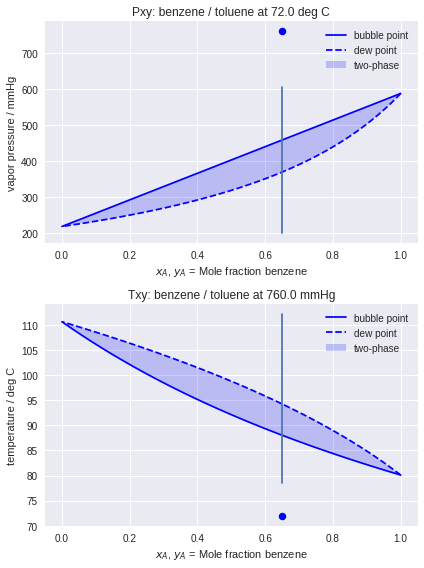

In [151]:
#@title PT Flash { run: "auto", vertical-output: true }
P = 760 #@param {type:"slider", min:200, max:1200, step:10}
T = 72 #@param {type:"slider", min:30, max:140, step:1}
z = 0.65 #@param {type:"slider", min:0, max:1, step:0.01}

import matplotlib.pyplot as plt
import numpy as np

def PTflash(A, B, P, T, z):
    xA = (P - B.Psat(T))/(A.Psat(T) - B.Psat(T))
    yA = xA*A.Psat(T)/P
    
    plt.figure(figsize=(6,8))
    plt.subplot(2,1,1)
    Pxy(A, B, T)
    plt.plot([z ,z], plt.ylim())
    if xA < z < yA:
        plt.plot([xA, yA], [P, P], 'b-', marker='.', ms=15)
    else:
        plt.plot(z, P, 'b.', ms=15)
        
    plt.subplot(2,1,2)
    Txy(A, B, P)
    plt.plot([z ,z], plt.ylim())
    if xA < z < yA:
        plt.plot([xA, yA], [T, T], 'b-', marker='.', ms=15)
    else:
        plt.plot(z, T, 'b.', ms=15)
    plt.tight_layout()
    
PTflash(A, B, P, T, z)


## Exercises

1. Modify this notebook to create Txy and xy diagrams for an acetaldehyde/ethanol mixture.  Create an x-y diagram, and compare to the experimental data avaiable here: S. G. D'Avila and R. S. F. Silva, "Isothermal vapor-liquid equilibrium data by total pressure method. Systems acetaldehyde-ethanol, acetaldehyde-water, and ethanol-water," Journal of Chemical & Engineering Data, vol. 15 (3), 421-424, 1970.